# Support Vector Regressor Implementation

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
## Lets create a synthetics data set. 
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=1000,n_features=2, n_targets=1,noise=3.0)


In [5]:
X

array([[ 0.10841968, -0.17055532],
       [ 0.23722632, -0.04694608],
       [ 1.70996094, -0.05957893],
       ...,
       [ 0.56635905, -1.19599014],
       [-0.6956038 ,  1.01500212],
       [ 2.63114434, -0.82257434]], shape=(1000, 2))

In [6]:
pd.DataFrame(X)[0]

0      0.108420
1      0.237226
2      1.709961
3      0.430910
4     -0.855795
         ...   
995   -0.594736
996   -0.006832
997    0.566359
998   -0.695604
999    2.631144
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

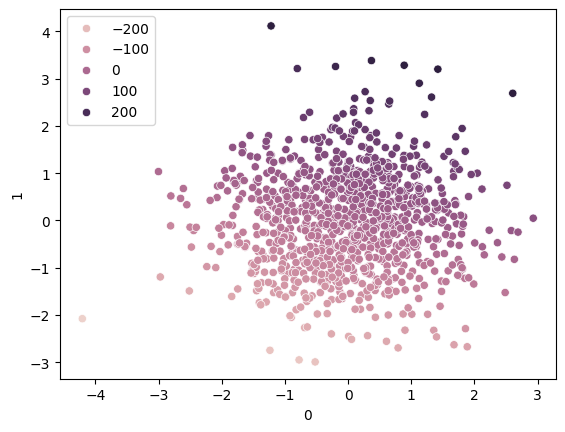

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [16]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [17]:
svr.coef_

array([[24.75545223, 69.10547334]])

In [18]:
y_pred = svr.predict(X_test)

In [30]:
y_pred

array([ 133.48981942,    8.16890349,   79.32678147,  -57.89015676,
        -29.04929007,  -28.81871256,   41.40535365,  -94.57067164,
         31.70248389,   55.85360466,  -19.78107671,  -92.75203367,
        -77.36761072,   85.91924301,   -2.28814083,   87.47486706,
         87.55849476,  -36.38673952,   36.39971277,    4.26233959,
        -62.37125825,  -77.78470847,   51.53911987,    4.60071074,
        131.4688228 ,  220.28650032,  -71.0702813 ,   30.94419496,
         52.80281661,   -7.95572189,   92.85229789,  -69.41874186,
        107.84098216,   33.68298373,  -30.90252818,   58.94978497,
         67.40198065,  -67.99836915,  -14.13530956,  -44.93920663,
         80.50100307,  185.1821179 ,  168.66992815,   55.8785174 ,
        -28.13706763,    5.23810162,   -8.52965555,  -73.4147962 ,
        -39.62075294, -129.6912043 ,   -4.62846129,  -57.96785585,
         -4.98027519,  -69.31549171,  -25.29336104,    6.41389394,
         43.03930062,  -19.85680532,  -29.96268468,    6.55492

In [35]:
from sklearn.metrics import accuracy_score,r2_score
r2_score(y_true=y_test,y_pred=y_pred)

0.9982503964832528

# Hyperparameter Tunning

In [39]:
from sklearn.model_selection import GridSearchCV
# defining parameter range 
parameter = {
    'C':[0.1,1,10,100,1000], 
    "gamma":[1,0.1,0.01,0.001,0.0001], 
    'kernel':['linear']
}

In [40]:
grid = GridSearchCV(SVR(),param_grid=parameter,refit=True,cv=5,verbose=3)

In [41]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.879 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.895 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.881 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.891 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.879 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.895 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.881 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.891 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.875 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.879 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [42]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [45]:
# Predection 
y_pred1 = grid.predict(X_test)
print(r2_score(y_test,y_pred1))

0.9983002371319045
